In [29]:
import numpy as np
import pandas as pd 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv("marketing_AB.csv")

In [13]:
print(df.head()) # View the first few rows of the dataset
df.info() # Get information about the data types and number of non-null values in each column
df.describe() # Get summary statistics for numeric columns
df.isnull().sum() # Check for missing values

   Unnamed: 0  user id test group  converted  total ads most ads day  \

0           0  1069124         ad      False        130       Monday   

1           1  1119715         ad      False         93      Tuesday   

2           2  1144181         ad      False         21      Tuesday   

3           3  1435133         ad      False        355      Tuesday   

4           4  1015700         ad      False        276       Friday   



   most ads hour  

0             20  

1             22  

2             18  

3             10  

4             14  

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 588101 entries, 0 to 588100

Data columns (total 7 columns):

 #   Column         Non-Null Count   Dtype 

---  ------         --------------   ----- 

 0   Unnamed: 0     588101 non-null  int64 

 1   user id        588101 non-null  int64 

 2   test group     588101 non-null  object

 3   converted      588101 non-null  bool  

 4   total ads      588101 non-null  int64 

 5   most ad

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

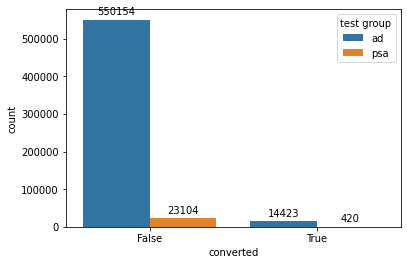

In [6]:
ax = sns.countplot(x="converted", hue="test group", data=df)

# Get the counts for each bar
counts = df.groupby(["test group", "converted"]).size().reset_index(name="count")

# Add text to each bar
for i, bar in enumerate(ax.containers):
    for j, count in enumerate(bar):
        height = count.get_height()
        ax.annotate(counts.iloc[i*2+j]["count"], xy=(count.get_x() + count.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

plt.show()

In [7]:
ttest_results = ttest_ind(df[df["test group"] == "ad"]["converted"], df[df["test group"] == "psa"]["converted"])
print(ttest_results)

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)


The statistic value of 7.37 represents the t-statistic for the test. This value indicates that there is a significant difference between the means of the two groups being compared.

The pvalue value of 1.70e-13 represents the probability of observing a t-statistic at least as extreme as the observed value, assuming that there is no difference between the means of the two groups being compared (i.e., assuming the null hypothesis). This value is very small, which suggests strong evidence against the null hypothesis and in favor of the alternative hypothesis (i.e., that there is a significant difference between the means of the two groups).

Taken together, these results suggest that there is a significant difference between the means of the two groups being compared, and that this difference is unlikely to have occurred by chance alone.

In [8]:
conversion_rates = df.groupby("test group")["converted"].mean()
print(conversion_rates)

test group

ad     0.025547

psa    0.017854

Name: converted, dtype: float64


Based on these conversion rates, we can interpret that the ad group had a higher conversion rate (0.025547) compared to the PSA group (0.017854). This suggests that the ads were effective in driving conversions and that the ad campaign was successful.

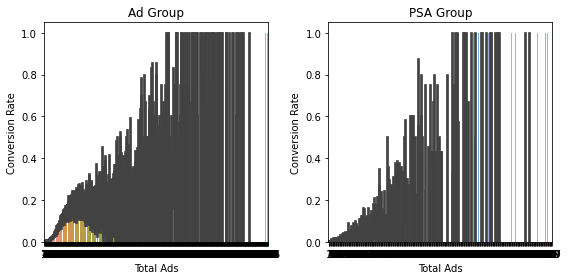

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.barplot(x="total ads", y="converted", data=df[df["test group"] == "ad"], ax=ax[0])
ax[0].set(title="Ad Group", xlabel="Total Ads", ylabel="Conversion Rate")

sns.barplot(x="total ads", y="converted", data=df[df["test group"] == "psa"], ax=ax[1])
ax[1].set(title="PSA Group", xlabel="Total Ads", ylabel="Conversion Rate")

plt.tight_layout()
plt.show()

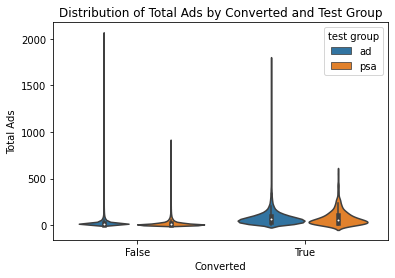

In [10]:
sns.violinplot(x="converted", y="total ads", hue="test group", data=df)
plt.title("Distribution of Total Ads by Converted and Test Group")
plt.xlabel("Converted")
plt.ylabel("Total Ads")
plt.show()

<AxesSubplot:xlabel='most ads hour', ylabel='converted'>

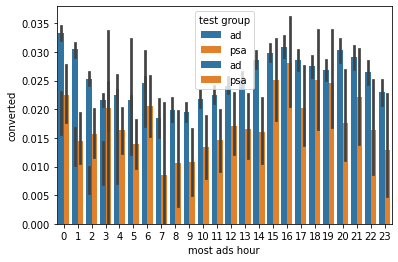

In [11]:
sns.barplot(x="most ads day", y="converted", hue="test group", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.barplot(x="most ads hour", y="converted", hue="test group", data=df)

In [18]:
# Group the data by most ads hour, and calculate the mean of the converted column
conversion_by_hour = df.groupby("most ads hour")["converted"].mean()

# Find the hour with the highest conversion rate
max_conversion_hour = conversion_by_hour.idxmax()

# Print the result
print("The hour of the day with the highest conversion rate was:", max_conversion_hour)

The hour of the day with the highest conversion rate was: 16


So 4 pm in a day has the maximum business

In [15]:
# Calculate conversion rate by day and test group
conversion_by_day = df.groupby(["most ads day", "test group"])["converted"].mean()

# Reshape the data from long to wide format
conversion_by_day = conversion_by_day.unstack(level=1)

# Sort the values in descending order
conversion_by_day = conversion_by_day.sort_values(by=["ad", "psa"], ascending=False)

# Print the result
print(conversion_by_day)

test group          ad       psa

most ads day                    

Monday        0.033241  0.022559

Tuesday       0.030440  0.014448

Wednesday     0.025356  0.015759

Sunday        0.024620  0.020595

Friday        0.022465  0.016303

Thursday      0.021637  0.020230

Saturday      0.021307  0.013996


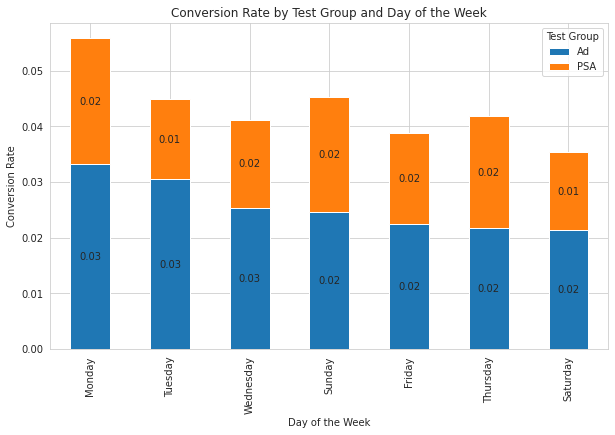

In [17]:
# Sort the values in descending order
conversion_by_day = conversion_by_day.sort_values(by=["ad", "psa"], ascending=False)

# Create a stacked bar plot of the conversion rate by day and test group
sns.set_style("whitegrid")
ax = conversion_by_day.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Conversion Rate by Test Group and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Conversion Rate")

# Add value labels to each bar segment
for i in range(conversion_by_day.shape[0]):
    ad_value = conversion_by_day.iloc[i]["ad"]
    psa_value = conversion_by_day.iloc[i]["psa"]
    ax.text(i, ad_value / 2, f"{ad_value:.2f}", ha="center", va="center")
    ax.text(i, ad_value + psa_value / 2, f"{psa_value:.2f}", ha="center", va="center")

plt.legend(title="Test Group", labels=["Ad", "PSA"])
plt.show()

Monday is the maximum business day

In [22]:
# Group the data by most ads hour and calculate the mean of the converted column
conversion_by_hour = df.groupby("most ads hour")["converted"].mean()

# Sort the values in ascending order and take the top 10
top_10_less_business_hours = conversion_by_hour.sort_values().head(10)

# Print the result
print("Top 10 hours with less business:")
print(top_10_less_business_hours)

Top 10 hours with less business:

most ads hour

2     0.007313

3     0.010452

1     0.012911

4     0.015235

7     0.018111

0     0.018425

9     0.019191

8     0.019516

5     0.020915

10    0.021521

Name: converted, dtype: float64


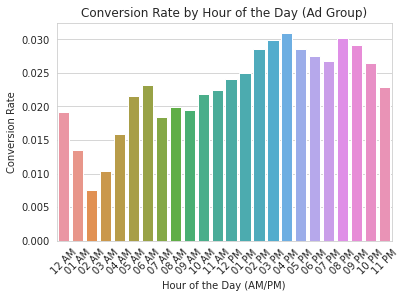

In [27]:
# Filter the data to include only the "ad" group
df_ad = df[df["test group"] == "ad"]

# Group the data by hour of the day, and calculate the mean of the converted column
conversion_by_hour = df_ad.groupby("most ads hour")["converted"].mean().reset_index()

# Create a new column for the hour in AM/PM format
conversion_by_hour["hour_ampm"] = pd.to_datetime(conversion_by_hour["most ads hour"], format="%H:%M:%S").dt.strftime("%I %p")

# Create a bar plot of the conversion rate by hour of the day
sns.barplot(data=conversion_by_hour, x="hour_ampm", y="converted")
plt.title("Conversion Rate by Hour of the Day (Ad Group)")
plt.xlabel("Hour of the Day (AM/PM)")
plt.ylabel("Conversion Rate")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

In [12]:
print("The conversion rate for the ad group is {:.2f}%".format(conversion_rates["ad"] * 100))
print("The conversion rate for the PSA group is {:.2f}%".format(conversion_rates["psa"] * 100))
print("The t-test p-value is {:.4f}".format(ttest_results.pvalue))

The conversion rate for the ad group is 2.55%

The conversion rate for the PSA group is 1.79%

The t-test p-value is 0.0000


The ad group had a higher conversion rate (2.55%) compared to the PSA group (1.79%). This indicates that the ad campaign was more effective in driving conversions compared to the PSA.

The t-test p-value of 0.0000 suggests that the difference in conversion rates between the two groups is statistically significant, meaning that it is unlikely to have occurred by chance alone. This strengthens our confidence in the observed difference between the two groups.

Overall, this suggests that the ad campaign was successful in driving conversions, and that the difference in conversion rates between the two groups is likely due to the impact of the ads.